In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#converting dtype of 'Period' column from object to datetime, b=abbrevated mon and y=year without century(00-99)

dateparse = lambda dates: pd.datetime.strptime(dates, '%b-%y')

In [3]:
original= pd.read_csv('USCarrier_Traffic.csv',parse_dates=['Period'], index_col='Period',date_parser=dateparse)
df= pd.read_csv('USCarrier_Traffic.csv',parse_dates=['Period'], index_col='Period',date_parser=dateparse)
df.head()

,Total
Period,
2000-01-01,49045412
2000-02-01,49306303
2000-03-01,60443541
2000-04-01,58286680
2000-05-01,60533783


In [4]:
df.shape

(242, 1)

In [5]:
df1=df['Total']
df1.head()

Period
2000-01-01    49045412
2000-02-01    49306303
2000-03-01    60443541
2000-04-01    58286680
2000-05-01    60533783
Name: Total, dtype: int64

In [6]:
df1.tail()

Period
2019-10-01    88190827
2019-11-01    80993251
2019-12-01    90371201
2020-01-01    81511977
2020-02-01    74398772
Name: Total, dtype: int64

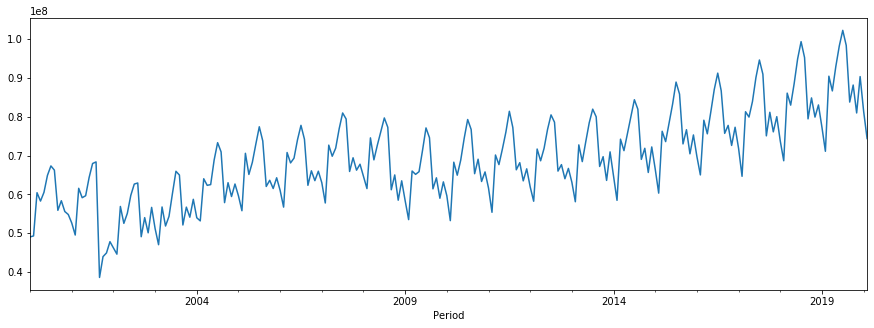

In [7]:
df1.plot(kind="line", figsize=(15,5))
plt.show()

Here we can infer that there is an increasing trend in the series, i.e., the number of count is increasing with respect to time. 

#(20 years data * 12 months) + 2 months data = 242 data points
#Train data: 15 years = 15 * 12= 180
#Test data: 5 years and 2 months

In [8]:
train=df1[0:180] 
test=df1[180:]

In [9]:
train.head()

Period
2000-01-01    49045412
2000-02-01    49306303
2000-03-01    60443541
2000-04-01    58286680
2000-05-01    60533783
Name: Total, dtype: int64

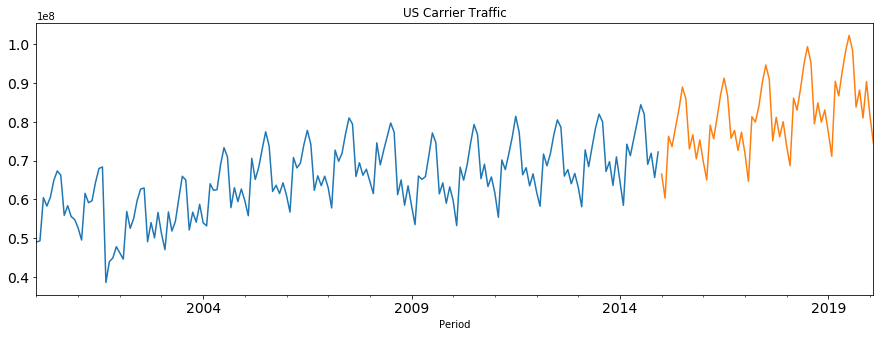

In [10]:
train.plot(figsize=(15,5), title= 'US Carrier Traffic', fontsize=14)
test.plot(figsize=(15,5), title= 'US Carrier Traffic', fontsize=14)
plt.show()

In [11]:
#rolling mean of window 12 months

df.Total.rolling(12).mean() 

Period
2000-01-01             NaN
2000-02-01             NaN
2000-03-01             NaN
2000-04-01             NaN
2000-05-01             NaN
                  ...     
2019-10-01    8.770662e+07
2019-11-01    8.779537e+07
2019-12-01    8.840481e+07
2020-01-01    8.875310e+07
2020-02-01    8.902675e+07
Name: Total, Length: 242, dtype: float64

# Moving average

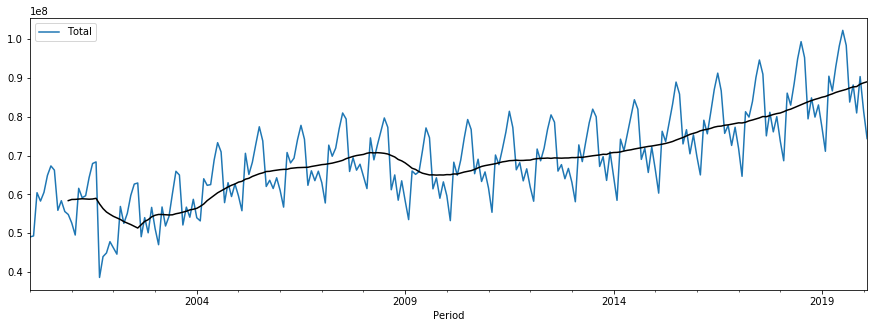

In [12]:
# rolling window calculation of 12 months

moving_avg = df1.rolling(12).mean()
df.plot(kind='line', figsize=(15,5))
moving_avg.plot(kind="line",figsize=(15,5),color='black')
plt.show()

In [13]:
# Seasonal decomposition using moving averages

import statsmodels.tsa.seasonal as sts

In [14]:
# An object with seasonal, trend, and resid attributes

decomposition = sts.seasonal_decompose(df1,model='additive', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

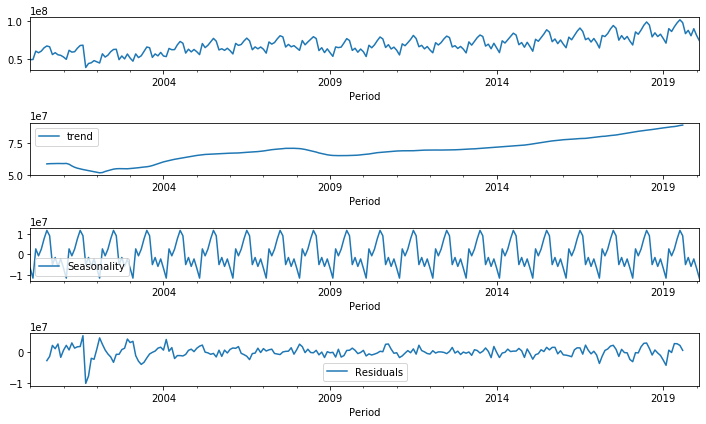

In [15]:
plt.subplot(411)
df1.plot(kind="line",figsize=(10,6),label='Original')

plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')

plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

# Exponential Smoothing Technique

In [16]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [17]:
train = train.astype('double')
ses = SimpleExpSmoothing(train).fit()
ses1 = ses.forecast(62)
ses.summary()

C:\Users\BMS\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Dep. Variable:,endog,No. Observations:,180
Model:,SimpleExpSmoothing,SSE,7556547809897245.000
Optimized:,True,AIC,5650.282
Trend:,None,BIC,5656.668
Seasonal:,None,AICC,5650.511
Seasonal Periods:,None,Date:,"Sun, 07 Jun 2020"
Box-Cox:,False,Time:,22:14:08
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7070349,alpha,True
initial_level,4.9045e+07,l.0,True


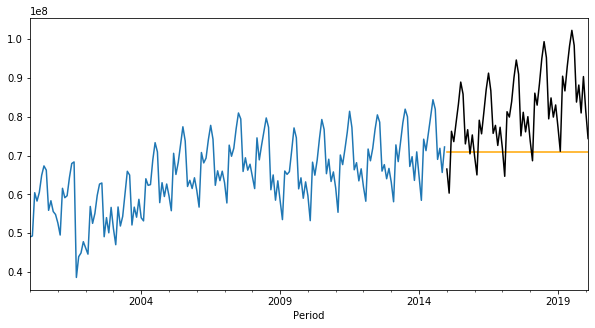

In [18]:
train.plot(kind="line",figsize=(10,5))
ses1.plot(kind="line",figsize=(10,5),color='orange')
test.plot(kind="line",figsize=(10,5),color='black')
plt.show()

In [19]:
hes = ExponentialSmoothing(train, trend='add').fit()
hes.summary()

C:\Users\BMS\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Dep. Variable:,endog,No. Observations:,180
Model:,ExponentialSmoothing,SSE,7558414454844786.000
Optimized:,True,AIC,5654.327
Trend:,Additive,BIC,5667.098
Seasonal:,None,AICC,5654.812
Seasonal Periods:,None,Date:,"Sun, 07 Jun 2020"
Box-Cox:,False,Time:,22:14:09
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7077206,alpha,True
smoothing_slope,0.000000,beta,True


In [20]:
hes1 = hes.forecast(62)

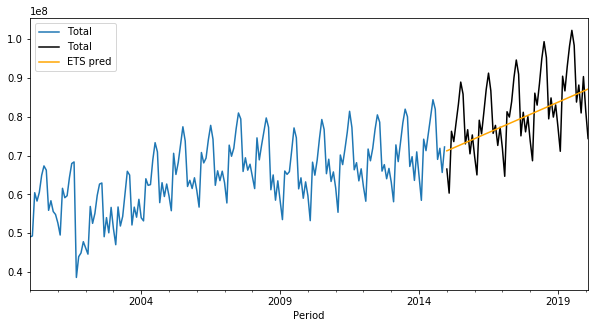

In [21]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

In [22]:
hwes = ExponentialSmoothing(train, seasonal_periods=12 ,trend='add', seasonal="multiplicative",).fit()
hwes.summary()

C:\Users\BMS\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Dep. Variable:,endog,No. Observations:,180
Model:,ExponentialSmoothing,SSE,630049956656138.500
Optimized:,True,AIC,5231.095
Trend:,Additive,BIC,5282.183
Seasonal:,Multiplicative,AICC,5235.344
Seasonal Periods:,12,Date:,"Sun, 07 Jun 2020"
Box-Cox:,False,Time:,22:14:10
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6517963,alpha,True
smoothing_slope,1.8821e-09,beta,True


In [23]:
hwes1 = hwes.forecast(62)

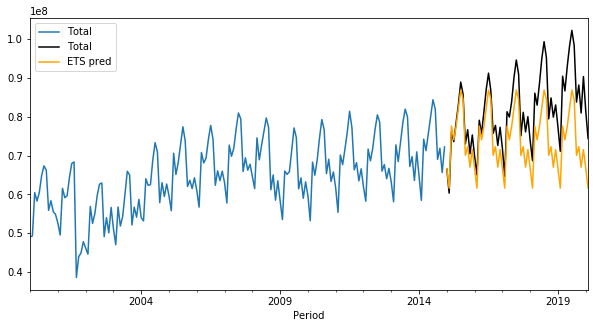

In [24]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hwes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

In [25]:
from statsmodels.tsa.stattools import adfuller

In [26]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    #rolstd = pd.rolling_std(timeseries, window=12)
    
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
# H0: series is nonstationary
# H1: series is stationary

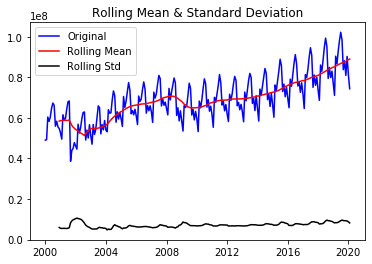

Results of Dickey-Fuller Test:
Test Statistic                   0.223216
p-value                          0.973534
#Lags Used                      13.000000
Number of Observations Used    228.000000
Critical Value (1%)             -3.459361
Critical Value (5%)             -2.874302
Critical Value (10%)            -2.573571
dtype: float64


In [27]:
test_stationarity(df1)

In [28]:
#series is not stationary as mean is increasing even though the std.
#pvalue> 0.05 hence H0 accepted that the series is nonstationary

In [29]:
diff1=train.diff()
diff1=diff1.dropna()

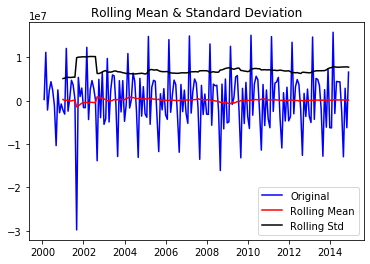

Results of Dickey-Fuller Test:
Test Statistic                  -3.434626
p-value                          0.009834
#Lags Used                      12.000000
Number of Observations Used    166.000000
Critical Value (1%)             -3.470370
Critical Value (5%)             -2.879114
Critical Value (10%)            -2.576139
dtype: float64


In [30]:
test_stationarity(diff1)

In [31]:
diff2=diff1.diff()
diff2=diff2.dropna()

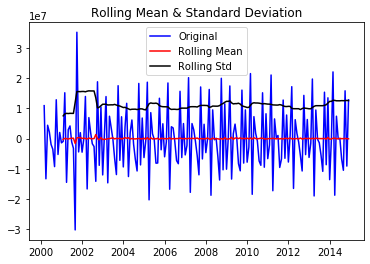

Results of Dickey-Fuller Test:
Test Statistic                -1.439089e+01
p-value                        8.828621e-27
#Lags Used                     1.100000e+01
Number of Observations Used    1.660000e+02
Critical Value (1%)           -3.470370e+00
Critical Value (5%)           -2.879114e+00
Critical Value (10%)          -2.576139e+00
dtype: float64


In [32]:
test_stationarity(diff2)

In [33]:
#series is stationary as mean and std is constatnt.
#pvalue< 0.05 hence H0 rejected that the series is stationary

In [34]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

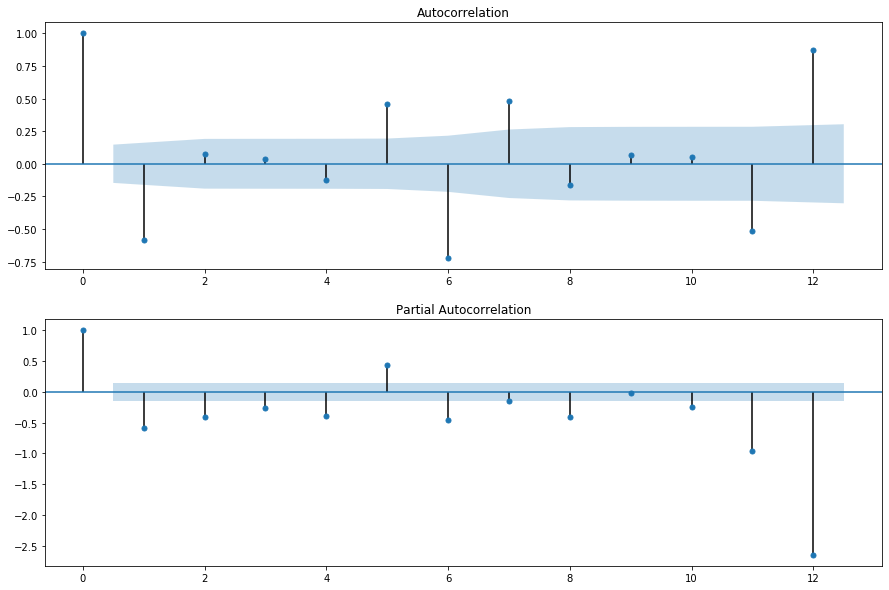

In [35]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diff2, ax=pyplot.gca(),lags=12)
pyplot.subplot(212)
plot_pacf(diff2, ax=pyplot.gca(),lags=12)
pyplot.show()

In [38]:
from pyramid.arima import auto_arima

model = auto_arima(train)
model.fit(train)

forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

ModuleNotFoundError: No module named 'pyramid.arima'

In [ ]:
#!pip install pyramid
#!pip install pyramid-arima

In [ ]:
print(model.summary())

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model = ARIMA(train, order=(2,2,2))
model_fit=model.fit(disp=True)
print(model_fit.summary())

In [ ]:
forecast = model_fit.forecast(steps=24)[0]

forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
print(mean_absolute_error(y_true=test,y_pred=forecast))

In [ ]:
import statsmodels.api as sm

In [ ]:
diffs1=diff2.diff(12)
diffs1=diffs1.dropna()

In [ ]:
test_stationarity(diffs1)

In [ ]:
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diffs1, ax=pyplot.gca(),lags=12)
pyplot.subplot(212)
plot_pacf(diffs1, ax=pyplot.gca(),lags=12)
pyplot.show()

In [ ]:
train.shape

In [ ]:
model = sm.tsa.SARIMAX(train, order=(2,2,2), seasonal_order=(0,1,2,12))

In [ ]:
model_fit=model.fit(disp=True)
print(model_fit.summary())

In [ ]:
forecast = model_fit.forecast(steps=24)
#print(forecast)

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [ ]:
print(mean_absolute_error(y_true=test,y_pred=forecast))